## Imports and data checks

In [1]:
# Imports and initial setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("reddit_database.csv")
df.columns

Index(['created_date', 'created_timestamp', 'subreddit', 'title', 'id',
       'author', 'author_created_utc', 'full_link', 'score', 'num_comments',
       'num_crossposts', 'subreddit_subscribers', 'post'],
      dtype='object')

## Post Count by Subreddit

Text(0.5, 0, 'Post Count')

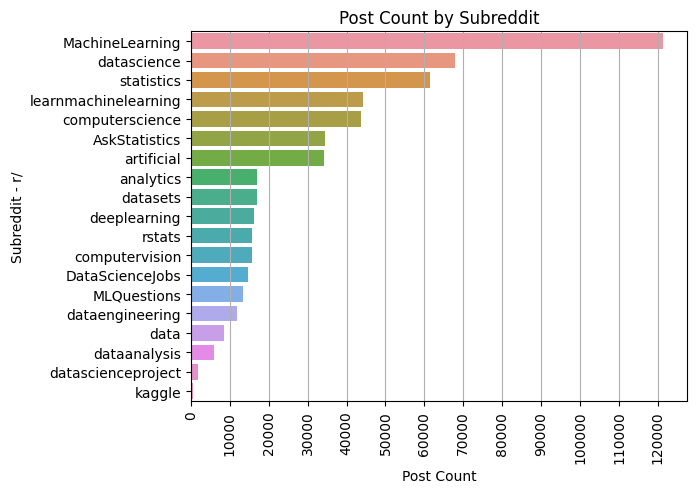

In [2]:
plt.xticks(np.arange(0, 130000, 10000), rotation=90)
plt.grid(True)
plt.title("Post Count by Subreddit")
sns.countplot(y="subreddit", data=df, order=df["subreddit"].value_counts().index)
plt.ylabel("Subreddit - r/")
plt.xlabel("Post Count")


## Unique authors by subreddit

Text(0.5, 0, 'Unique Authors')

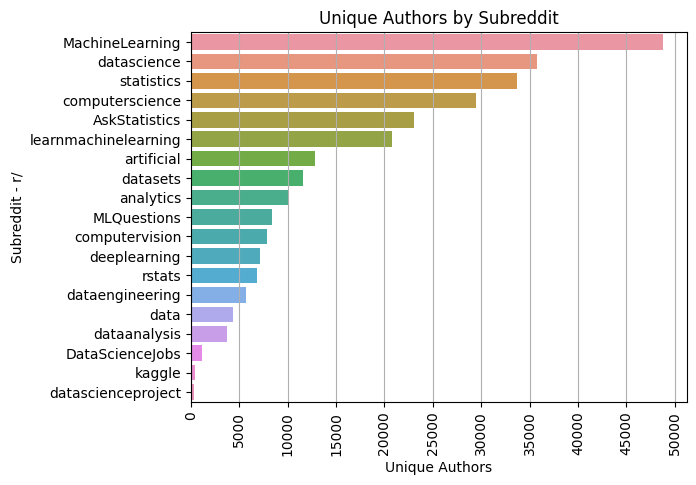

In [15]:
# Calculate unique authors per subreddit
authors = df["author"].groupby(df["subreddit"]).nunique().sort_values(ascending=False)
authors = pd.DataFrame(authors)
authors.columns = ["author_count"]
authors = authors.reset_index()

# Plot unique authors per subreddit
plt.xticks(np.arange(0, 130000, 5000), rotation=90)
plt.grid(True)
plt.title("Unique Authors by Subreddit")
sns.barplot(x="author_count", y="subreddit", data=authors, order=authors["subreddit"])
plt.ylabel("Subreddit - r/")
plt.xlabel("Unique Authors")


## Average Score by Subreddit

Text(0.5, 0, 'Average Score')

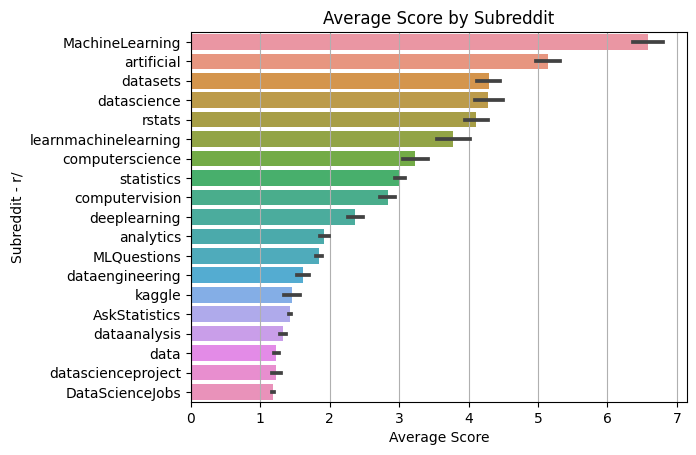

In [4]:
plt.grid(True)
plt.title("Average Score by Subreddit")
sns.barplot(
    y="subreddit",
    x="score",
    data=df,
    order=df.groupby("subreddit")["score"].mean().sort_values(ascending=False).index,
)
plt.ylabel("Subreddit - r/")
plt.xlabel("Average Score")


## Top Score By Subreddit

Text(0.5, 0, 'Top Score')

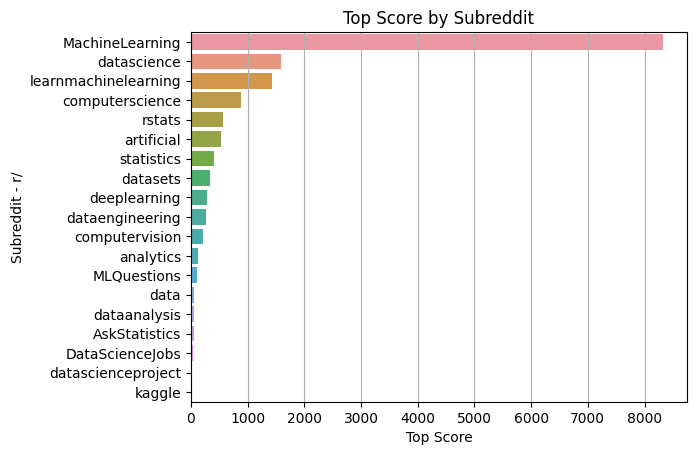

In [39]:
# Calculate top score per subreddit
top_score = df.groupby("subreddit")["score"].max().sort_values(ascending=False)
top_score = pd.DataFrame(top_score)
top_score.columns = ["top_score"]
top_score = top_score.reset_index()

# Plot top score per subreddit
plt.grid(True)
plt.title("Top Score by Subreddit")
sns.barplot(x="top_score", y="subreddit", data=top_score, order=top_score["subreddit"])
plt.ylabel("Subreddit - r/")
plt.xlabel("Top Score")

In [50]:
from tabulate import tabulate

# Print a table of the post with the highest score for each subreddit (sorted by score)
print(
    tabulate(
        df.sort_values(by=["subreddit", "score"], ascending=[True, False])
        .groupby("subreddit")
        .head(1)
        .sort_values(by="score", ascending=False)[
            ["subreddit", "title", "score"]
        ],
        headers="keys",
    )
)

        subreddit             title                                                                                                                                                                                                                                                                                           score
------  --------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  -------
197562  MachineLearning       [P] A lot of AI &amp; ML is built around the internet. Help fight to keep this technology free!                                                                                                                                                                                                  8331
 66495  datascience         

## Total number of comments per subreddit

Text(0.5, 0, 'Total Number of Comments')

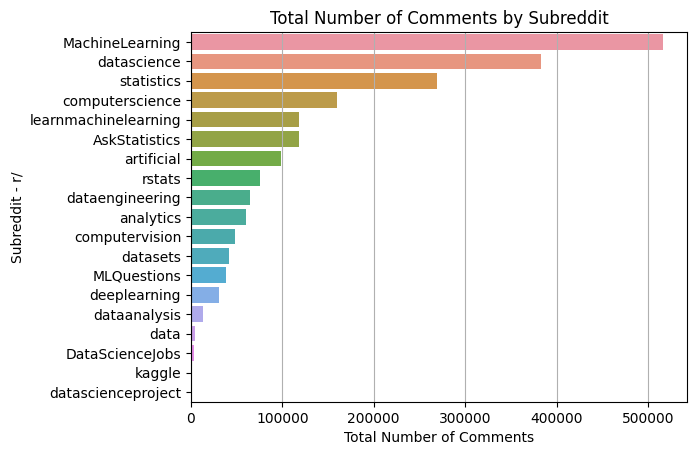

In [17]:
plt.grid(True)
plt.title("Total Number of Comments by Subreddit")
sns.barplot(
    y="subreddit",
    x="num_comments",
    data=df.groupby("subreddit")["num_comments"]
    .sum()
    .sort_values(ascending=False)
    .reset_index(),
)
plt.ylabel("Subreddit - r/")
plt.xlabel("Total Number of Comments")


## Average number of comments per subreddit

Text(0.5, 0, 'Average Number of Comments')

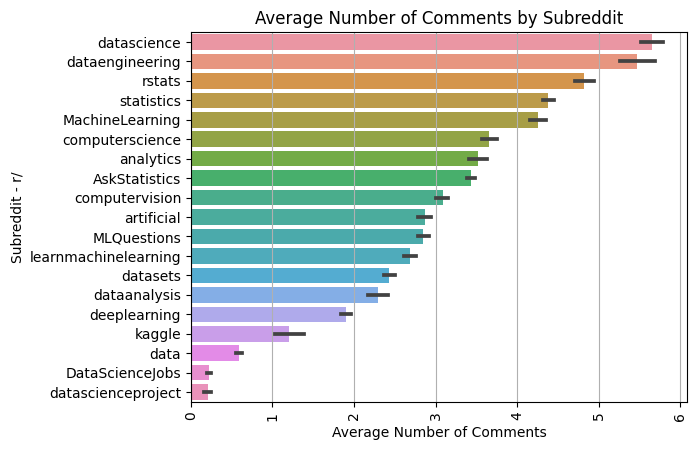

In [6]:
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Average Number of Comments by Subreddit")
sns.barplot(
    y="subreddit",
    x="num_comments",
    data=df,
    order=df.groupby("subreddit")["num_comments"]
    .mean()
    .sort_values(ascending=False)
    .index,
)
plt.ylabel("Subreddit - r/")
plt.xlabel("Average Number of Comments")


## Calculate number of crossposts in each subreddit

Text(0.5, 0, 'Number of Crossposts')

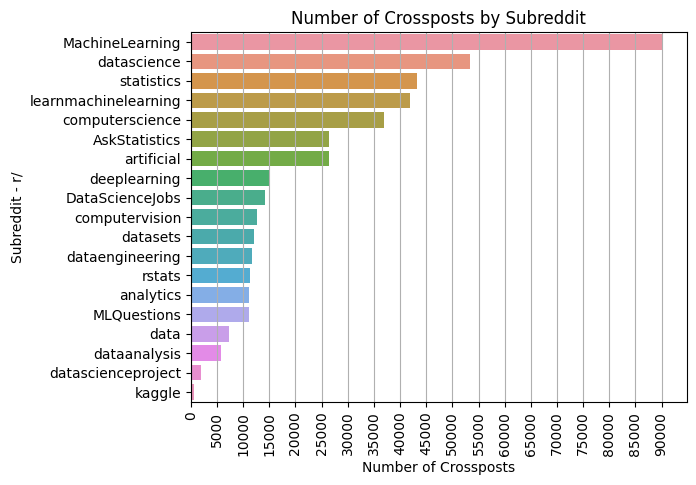

In [7]:
crossposts = (
    df.groupby("subreddit")["num_crossposts"]
    .count()
    .sort_values(ascending=False)
    .reset_index()
)
plt.xticks(np.arange(0, 100000, 5000), rotation=90)
plt.grid(True)
plt.title("Number of Crossposts by Subreddit")
sns.barplot(y="subreddit", x="num_crossposts", data=crossposts)
plt.ylabel("Subreddit - r/")
plt.xlabel("Number of Crossposts")


## Graph a heatmap of the top 10 titles by subreddit

Text(95.72222222222216, 0.5, 'Post Title')

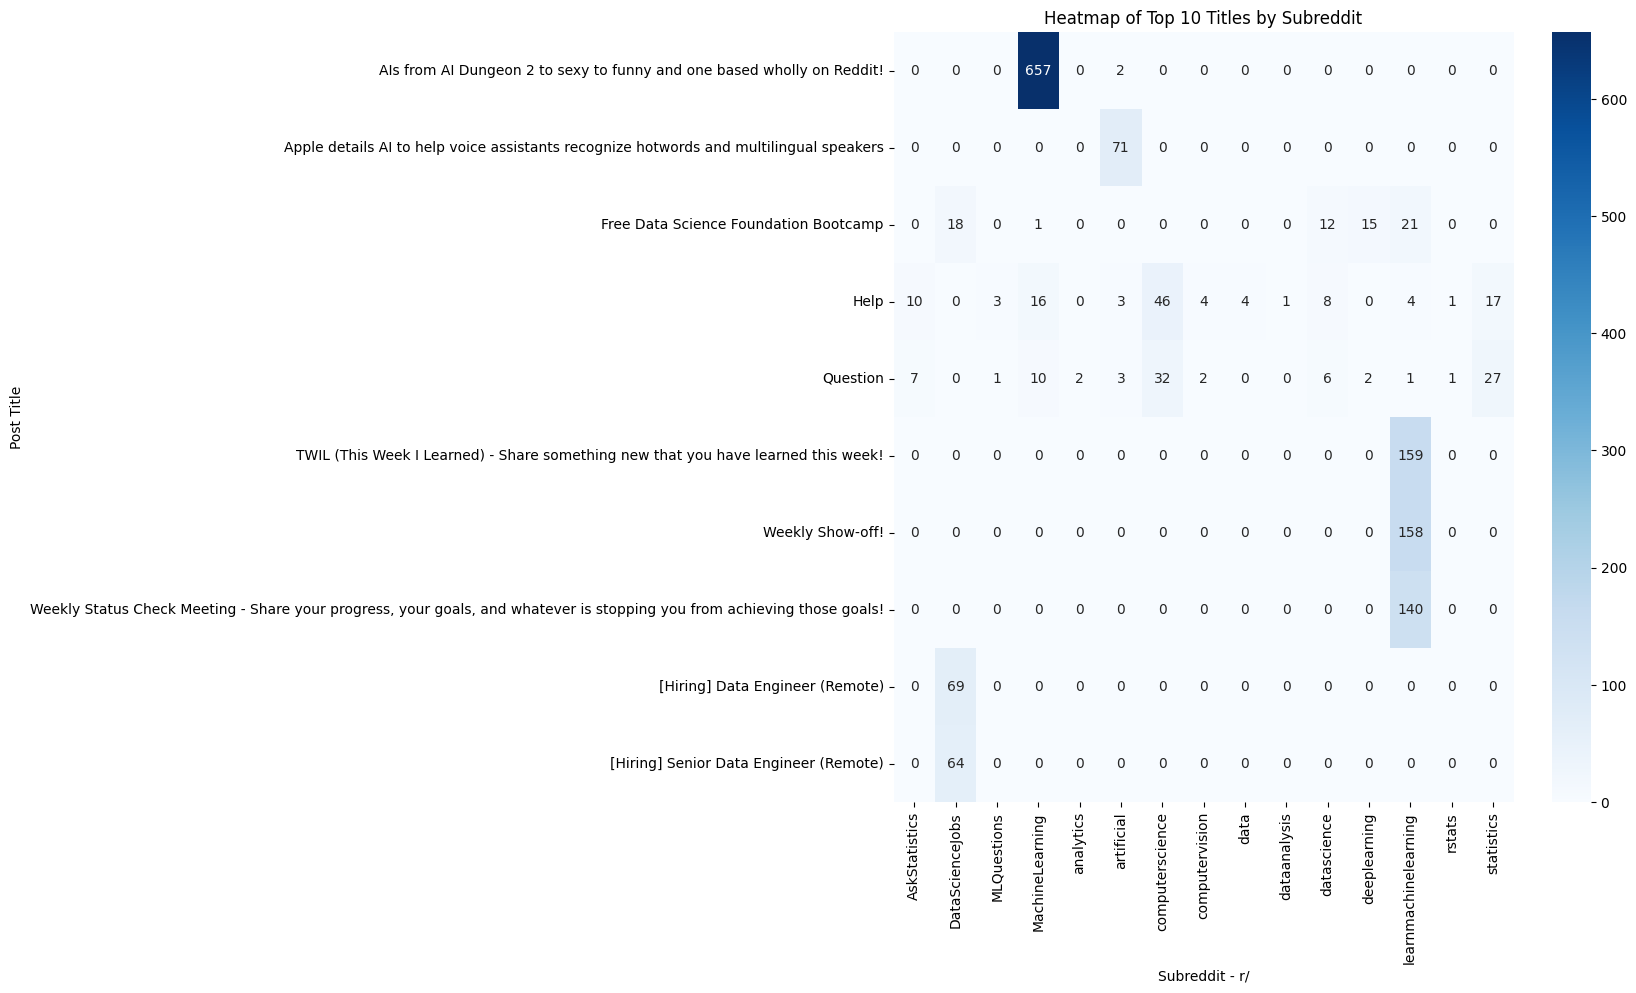

In [8]:
# calculate which titles are the most common
title_counts = (
    df.groupby("title")["title"]
    .count()
    .sort_values(ascending=False)
    .reset_index(name="count")
    .head(10)
)

plt.figure(figsize=(10, 10))
plt.title("Heatmap of Top 10 Titles by Subreddit")
sns.heatmap(
    df[df["title"].isin(title_counts["title"])].pivot_table(
        index="title", columns="subreddit", aggfunc="size", fill_value=0
    ),
    annot=True,
    fmt="d",
    cmap="Blues",
)
plt.xlabel("Subreddit - r/")
plt.ylabel("Post Title")


## Number of questions on post titles containing help or question

Text(0.5, 0, 'Average Number of Comments')

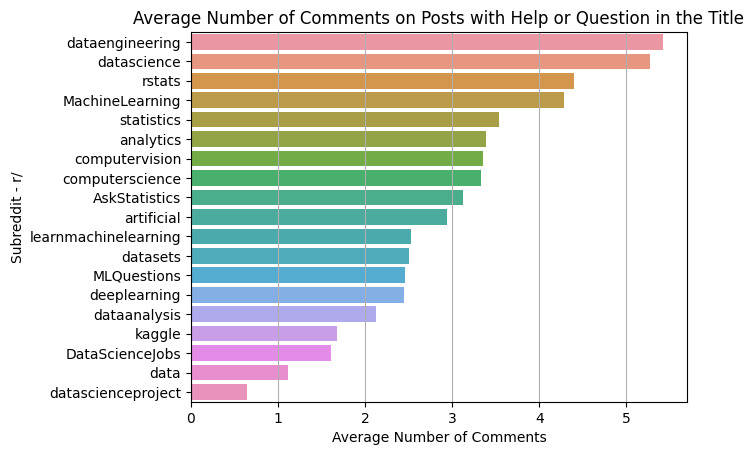

In [54]:
# Calculate the average number of comments on posts with help or question in the title
help_question = df[df["title"].str.contains("help|question", case=False)]
help_question = help_question.groupby("subreddit")["num_comments"].mean().sort_values(ascending=False)
help_question = pd.DataFrame(help_question)
help_question.columns = ["avg_num_comments"]
help_question = help_question.reset_index()

# Plot the average number of comments on posts with help or question in the title
plt.grid(True)
plt.title("Average Number of Comments on Posts with Help or Question in the Title")
sns.barplot(x="avg_num_comments", y="subreddit", data=help_question, order=help_question["subreddit"])
plt.ylabel("Subreddit - r/")
plt.xlabel("Average Number of Comments")

# Analysis on words in titles

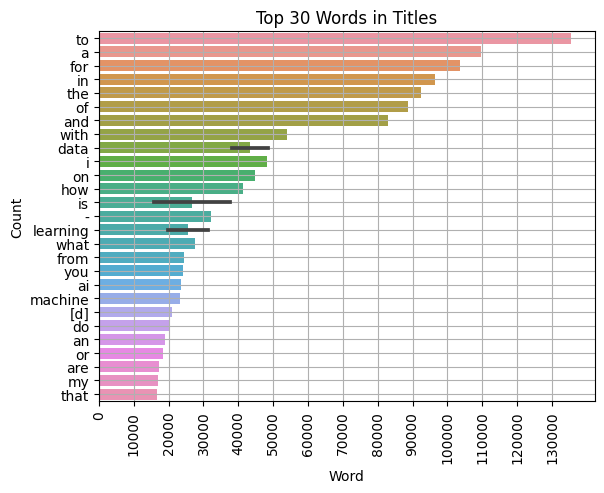

In [9]:
words = []
for title in df["title"]:
    words.extend(title.split())

# create a dataframe of the words and their counts
word_counts = pd.DataFrame(words, columns=["word"])
word_counts = (
    word_counts.groupby("word")["word"]
    .count()
    .sort_values(ascending=False)
    .reset_index(name="count")
)
word_counts["word"] = word_counts["word"].str.lower()

plt.title("Top 30 Words in Titles")
sns.barplot(y="word", x="count", data=word_counts.head(30))
plt.xticks(np.arange(0, 140000, 10000), rotation=90)
plt.xlabel("Word")
plt.ylabel("Count")
plt.grid(True)


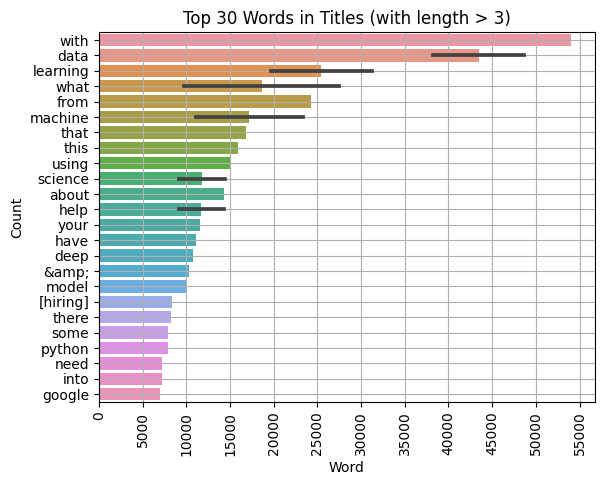

In [10]:
plt.title("Top 30 Words in Titles (with length > 3)")
sns.barplot(
    y="word", x="count", data=word_counts[word_counts["word"].str.len() > 3].head(30)
)
plt.xticks(np.arange(0, 56000, 5000), rotation=90)
plt.xlabel("Word")
plt.ylabel("Count")
plt.grid(True)


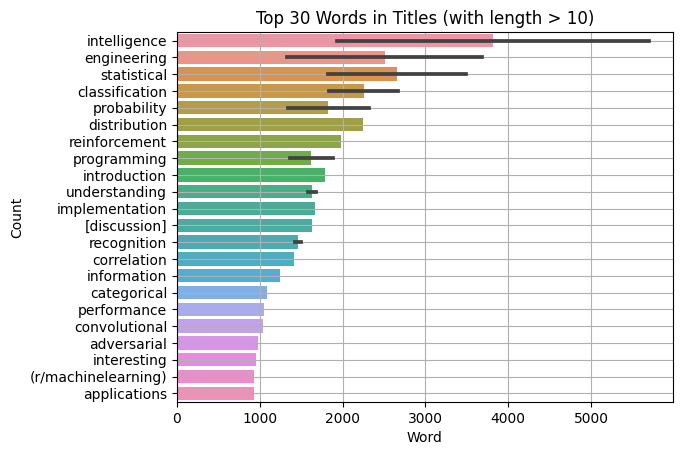

In [11]:
plt.title("Top 30 Words in Titles (with length > 10)")
sns.barplot(
    y="word", x="count", data=word_counts[word_counts["word"].str.len() > 10].head(30)
)
plt.xlabel("Word")
plt.ylabel("Count")
plt.grid(True)


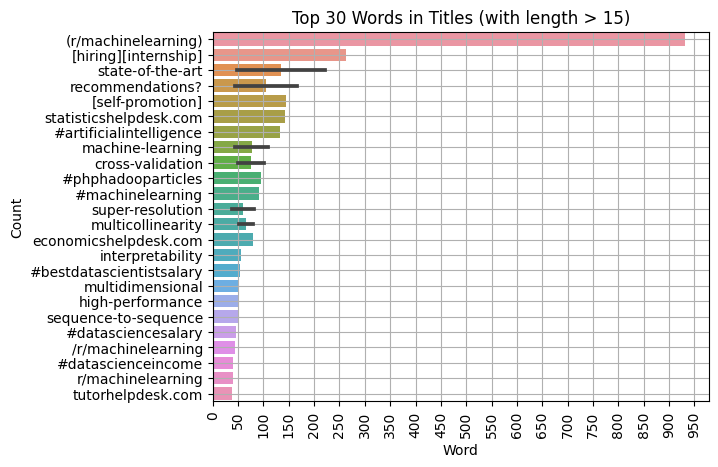

In [12]:
plt.title("Top 30 Words in Titles (with length > 15)")
sns.barplot(
    y="word", x="count", data=word_counts[word_counts["word"].str.len() > 15].head(30)
)
plt.xticks(np.arange(0, 1000, 50), rotation=90)
plt.xlabel("Word")
plt.ylabel("Count")
plt.grid(True)


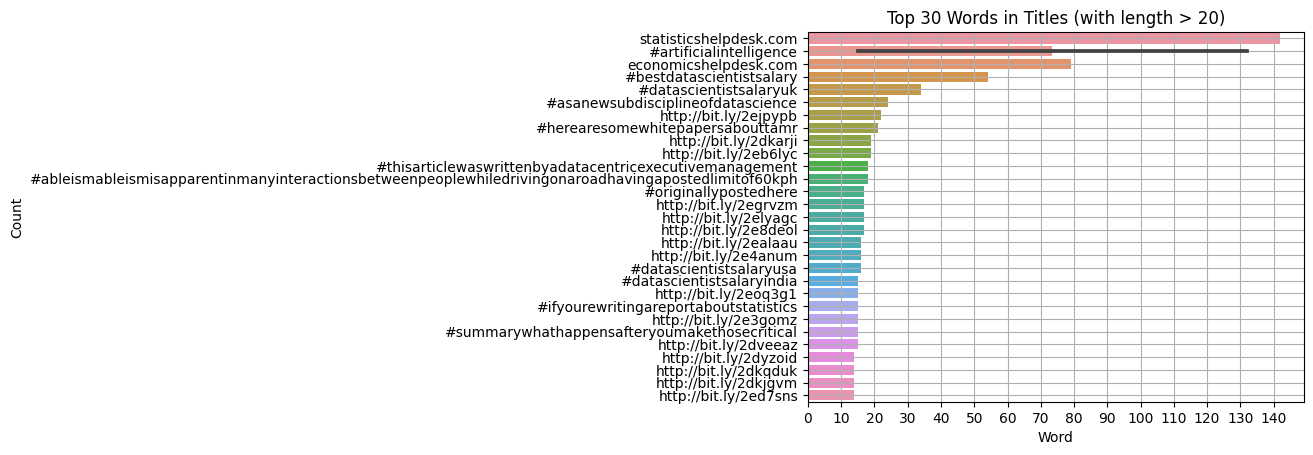

In [13]:
plt.title("Top 30 Words in Titles (with length > 20)")
sns.barplot(
    y="word", x="count", data=word_counts[word_counts["word"].str.len() > 20].head(30)
)
plt.xticks(np.arange(0, 150, 10))
plt.xlabel("Word")
plt.ylabel("Count")
plt.grid(True)


## print the word with the most characters and their its length

In [62]:
# Print the longest title
print(
    df[df["title"].str.len() == df["title"].str.len().max()][["title"]].to_string()
)
print(len(df[df["title"].str.len() == df["title"].str.len().max()][["title"]].to_string()))

                                                                                                                                                                                                                                                                                                                                title
352793  Interview w/Quinn Michaels about AI – Topics: 3:30 AI chatbots, 10:40 his background, 13:50 D-Wave &amp; Pakistan's NADRA tracking system, 22:00 Anonymous &amp; RA2020, 26:00 VT, D-Wave &amp; IoT, 30:00 LUX-Zeplin, Fermilab, &amp; collider networks, 39:00 Maps thereof, 1:02:00 Facebook &amp; AI control (Links below)
651
